# Laboratorio 1 : Monte Carlo y eficiencia de simulación

MA4402 - Simulación Estocástica: Teoría y Laboratorio

Profesor: Joaquín Fontobona T.

Auxiliares: Catalina Lizana, Álvaro Márquez, Matías Ortiz

30 de Agosto de 2023

**Integrantes:**

- Ramiro Hoffens
- Joaquín Márquez
- Miguel Escobar
-

## Problema 1

En _python_ existen distintas librerías que permiten simular variables aleatorias. Entre ellas se destacan las siguientes:

- [_Numpy_](https://numpy.org/doc/)

- [_Scipy_](https://docs.scipy.org/doc/scipy/)

- [_Random_](https://docs.python.org/3/library/random.html)

> 1 - Programe la función ``uniforme``, que reciba un valor entero n y un método (_Numpy_, _Scipy_ o _Random_), y retorne $n$ simulaciones de una variable aleatoria uniforme en $[0, 1]$.

In [1]:
import numpy as np
from numpy.random import uniform as numpy_uniform
from random import random
from scipy.stats import uniform as scipy_uniform

def uniforme(n, method):
    if method == 'numpy':
        return numpy_uniform(0, 1, n)
    elif method == 'random':
        return np.array([random() for _ in range(n)])
    elif method == 'scipy':
        return scipy_uniform.rvs(size=n)


# # Test:
 
# print(uniforme(10, 'numpy'))
# print(uniforme(10, 'random'))
# print(uniforme(10, 'scipy'))
    

> 2 - Genere $10^6$ uniformes para cada librería y grafique en un histograma cada muestra generada, utilizando la librería seaborn.

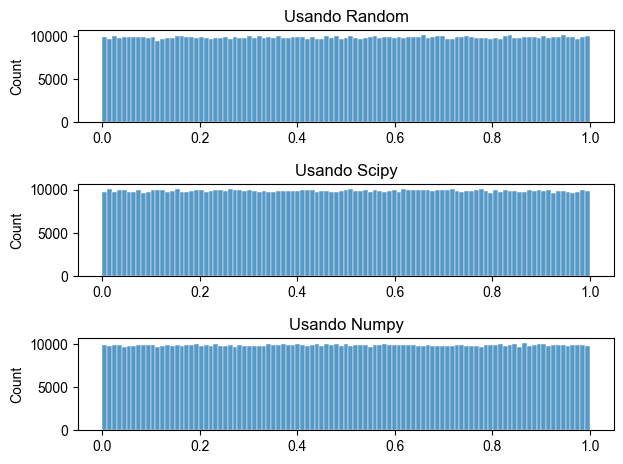

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

random_uniform_sample = uniforme(1_000_000, 'random')
scipy_uniform_sample = uniforme(1_000_000, 'scipy')
numpy_uniform_sample = uniforme(1_000_000, 'numpy')

fig = plt.figure()

randomax = fig.add_subplot(311)
scipyax = fig.add_subplot(312)
numpyax = fig.add_subplot(313)

randomax.set_title('Usando Random')
numpyax.set_title('Usando Numpy')
scipyax.set_title('Usando Scipy')

custom_params = {"axes.spines.right": False, "axes.spines.top": False}

sns.set_theme(style='ticks', palette='pastel')
sns.histplot(random_uniform_sample, ax=randomax, )
sns.histplot(numpy_uniform_sample, ax=numpyax)
sns.histplot(scipy_uniform_sample, ax=scipyax)

fig.tight_layout()
plt.show()


> 3 - Genere $100$ muestras de $1000$ uniformes en $[0,1]$ y utilizando la librería time calcule los tiempos de ejecución que toman generar cada muestra para cada librería. Grafique los tiempos encontrados para cada método y calcule la media y varianza del tiempo de ejecución por muestra de cada método.

In [3]:
from time import perf_counter

def time_method(method, sample_size=1000):
    t1 = perf_counter()
    uniforme(sample_size, method)
    t2 = perf_counter()
    return t2 - t1

numpy_times = np.array([time_method('numpy') for _ in range(100)])
scipy_times = np.array([time_method('scipy') for _ in range(100)])
random_times = np.array([time_method('random') for _ in range(100)])

print(f'Numpy.random tomó en promedio {numpy_times.mean()} [s], con una varianza de {numpy_times.var()} [s^2]')
print(f'La librería random tomó en promedio {random_times.mean()} [s], con una varianza de {random_times.var()} [s^2]')
print(f'Scipy.stats.uniform.rvs tomó en promedio {scipy_times.mean()} [s], con una varianza de {scipy_times.var()} [s^2]')




Numpy.random tomó en promedio 9.737992659211159e-06 [s], con una varianza de 1.3905531082562296e-10 [s^2]
La librería random tomó en promedio 4.923900822177529e-05 [s], con una varianza de 3.2735678244251015e-12 [s^2]
Scipy.stats.uniform.rvs tomó en promedio 2.503498923033476e-05 [s], con una varianza de 3.81987751748073e-10 [s^2]


> 4 - En base a los resultados anteriores. ¿Cual es el mejor método a utilizar? Argumente.

La implementación de Numpy es la más eficiente, tomando 2/3 del tiempo de scipy approx, y más de 3 veces menos que la de la librería random. La varianza en los 3 métodos es suficientemente chica como para que la diferencia de rendimiento no sea debido a errores aleatorios en la medición. Además que es mucho más simple de usar en mi opinion.

Distinto sería si se busca trabajar con una variable aleatoria en una forma más abstracta. Para esto, la implementación de scipy es mejor, utilizando el objeto scipy.stats.uniform.

> 5 - Genere funciones que permitan obtener una muestra para las siguientes variables a partir de uniformes:

- $Bernoulli(p)$

- $Binomial(p,N)$

- $Geometrica(p)$

> Utilice estas funciones y la librería _random_ para generar muestras de estas variables. Compare los tiempos de ejecución con los métodos para simular directamente estas variables disponibles en las librerías _numpy_ y _scipy_ (note que $Bernoulli(p)=Binomial(p,1)$).

Las librerías anteriores generan números **pseudoaleatorios** que se asemeja bastante a lo que se necesita.

> 6 - Averigüe y explique en qué consisten los métodos para generar números pseudoaleatorios uniformes en $[0,1]$ disponibles en la versión que se usará de Python. Especifique: número de bits, período (de congruencias lineal utilizada o medida equivalente para el método que corresponda), posibilidad y manera de cambiar semilla. Utilizar aproximadamente media plana de desarrollo incluyendo tablas y/o figuras.

Respuesta:

## Pregunta 2

Tomando en cuenta que

$$ I = \frac{\pi}{4} = \int^1_0\sqrt{1-x^2}dx=\int^1_0\int^1_0\mathbf{1}_{\{x^2+y^2\leq 1\}}dxdy \, ,$$

se considerarán dos métodos de Monte Carlo para calcular numéricamente $I$:

- Utilizando la variable aleatoria $X=\sqrt{1-U^2}$, con $U$ v.a. uniforme en $[0,1]$.

- Utilizando la variable aleatoria $Z={1}_{\{x^2+y^2\leq 1\}}$, con $U_i$ v.a. uniforme en $[0,1]$ e independientes.

> 1 - Calcule las varianzas $Var(X)$ y $Var(Z)$ de forma teórica y de forma simulada con diferentes cantidades de réplicas $n$. Grafique. Estime una cantidad de réplicas necesarias para $X$ y $Z$ con tal de obtener una aproximación de la varianza con un error del orden del $1\%$.

#### Respuesta teórica

Las varianzas respectivas las calcularemos de forma clásica, es decir:
$$\mathbb{E}\left[(X-\overline{X})^2\right] = \mathbb{E}\left[X^2\right]-\mathbb{E}\left[X\right]^2$$
Así, para $X$ obtenemos que esto corresponde a:
$$\mathbb{E}\left[X^2\right] = \int_0^1(1-x^2)dx = 1 - \left.\frac{x^3}{3}\right|_0^1 = 1 - \frac{1}{3} = \frac{2}{3}$$
Luego, sabemos que la esperanza es el valor de la integral que deseamos aproximar, esto es $\frac{\pi}{4}$. Entonces nos queda que la varianza es:
$$\text{Var}(X) = \frac{2}{3} - \frac{\pi^2}{16}$$
Por su parte con $Z$ haremos el desarrollo con la definición, esta es:
$$\text{Var}(Z) = \mathbb{E}\left[(Z-\overline{Z})^2\right]$$
Entonces si hacemos este cálculo se obtiene
$$\int_0^1\int_0^1 \left(\mathbf{1}_{x^2+y^2\leq 1}-\frac{\pi}{4}\right)^2 dxdy = \int_0^1\int_0^1 \mathbf{1}_{x^2+y^2\leq 1} - \frac{\pi}{2}\mathbf{1}_{x^2+y^2\leq 1} + \frac{\pi^2}{4^2} = \frac{\pi}{4}-\frac{\pi^2}{16}$$

In [4]:
# Respuesta programada
def X(n):
    """
    Toma un n entero positivo y realiza n simulaciones iid de X\n
    #################################\n
    Input:\n
    n = Int
    """
    U = np.random.uniform(0,1,n)
    X = np.sqrt(1 - U ** 2)
    return X

def varianzaX(n):
    """
    Calcula la varianza de X a mano con n simulaciones iid de tamaño n\n
    #################################\n
    Input:\n
    n = Int
    """
    valores = X(n)
    return np.var(valores)


def simularX(n):
    """
    Esta función realiza la esperanza como la suma para\n
    montecarlo usando las variables aleatorias X, n veces iid\n
    #################################\n
    Input\n
    n = Int
    """
    simulaciones = X(n)
    return np.sum(simulaciones) / n

print(np.pi/4)
print(simularX(1_000_000))

def Z(n):
    """
    Toma un n y realiza n simulaciones iid de Z\n
    La idea es modelar un cuadrado de lado n
    #################################\n
    Input\n
    n = Int
    """
    protoUx = np.random.uniform(0,1,n)
    protoUy = np.random.uniform(0,1,n)
    Z = (protoUx ** 2 + protoUy ** 2 <= 1)
    return Z*1

def varianzaZ(n):
    """
    Calcula la varianza de Z a mano con n simulaciones iid de tamaño n\n
    #################################\n
    Input:\n
    n = Int
    """
    valores = Z(n)
    return np.var(valores)

def simularZ(n):
    """
    Esta función realiza la esperanza como la suma para\n
    montecarlo usando las variables aleatorias Z, n veces iid\n
    #################################\n
    Input\n
    n = Int
    """
    simulaciones = Z(n)
    return np.sum(simulaciones) / n

print(np.pi/4)
print(simularZ(1_000_000))

0.7853981633974483
0.7851471633026672
0.7853981633974483
0.785402


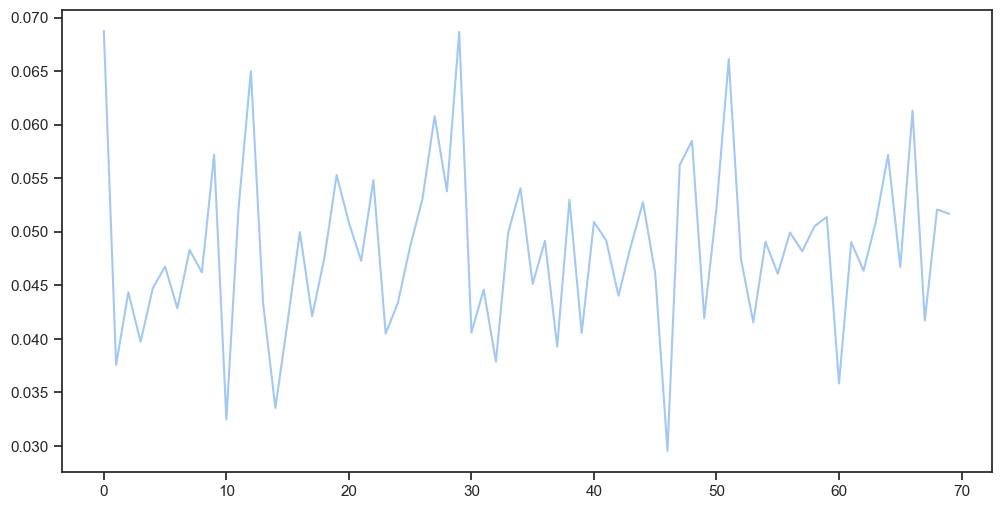

170


In [5]:
### Aquí borré unas cosas del lab que se pueden recuperar viendo las versiones del github porsiacaso.

k_x=100
old_varx = varianzaX(2)
new_varx = varianzaX(3)
varsX = []
while np.abs((old_varx - new_varx)/old_varx) > 0.01:
    k_x += 1
    old_varx = new_varx
    new_varx = varianzaX(k_x)
    varsX.append(new_varx)


fig, ax = plt.subplots(1,1,figsize=(12,6))

sns.lineplot(data=varsX, ax=ax)
# sns.lineplot(data=varsZ, ax=ax[1])

plt.show()
print(k_x)

In [6]:
def indicatrix(x, a, b):
    return (x <= b)*(x >= a)

replicas = [10, 100, 1_000, 1_000_000, 10_000_000]

xvars = []
zvars = []
for n in replicas:

    ux = uniforme(n, 'numpy')
    uy = uniforme(n, 'numpy')

    x_samples = np.sqrt(1 - ux**2)
    z_samples = indicatrix(ux**2 + uy**2, 0, 1)
    xvars.append(x_samples.var())
    zvars.append(z_samples.var())

xvars = np.array(xvars)
zvars = np.array(zvars)


print(xvars)
print(zvars)


[0.01309908 0.04330538 0.04933041 0.04972275 0.04981663]
[0.09       0.1659     0.176016   0.16864556 0.16860459]


> 2 - Calcule la cantidad de réplicas necesarias para $X$ y $Z$ con tal de aproximar $I$ con un error máximo de $Err_1 = 0,1$ y probabilidad $Pr_1 = 90 \%$. Haga el mismo ejercicio con $Err_2 = 0,01$ y $Pr_2 = 95 \%$, $Err_3 = 0,001$ y $Pr_3 = 99 \%$.

In [7]:
from scipy.stats import norm

def n_simulations(error, probability, std):
    n = (std**2 * norm.ppf(probability/2)**2)/error**2
    return np.floor(n)+1

theoretical_variance_X = 2/3 - np.pi**2/16
theoretical_variance_Z = np.pi/4 - np.pi**2/16

stdx = np.sqrt(theoretical_variance_X)
stdz = np.sqrt(theoretical_variance_Z)

# Caso 1:
prob = 0.9
epsilon = 0.1
nx = n_simulations(epsilon, prob, stdx)
nx

1.0

> 3 - Aproxime las esperanzas $\mathbb{E}(X)$ y $\mathbb{E}(Z)$ de forma simulada con diferentes cantidades de réplicas $n$ hasta
llegar al $n^*$ tal que se cumple $Err3$ y $Pr3$.

- Grafique las aproximaciones en función de la cantidad de réplicas.

- Grafique el tiempo utilizado en aproximar las esperanzas en función de la cantidad de réplicas. 

- Estime los costos de simular una réplica de $X$ y una réplica de $Z$.

> 4 - Considerando $Err3$ y $Pr3$ calcule un intervalo de confianza para $I$ utilizando $X$ y $Z$. Mida el tiempo total utilizado por cada método para obtener dicha precisión y compare los errores de estimación. Compare los costos totales para cada método ¿Cuál método es más eficiente?

> 5 - Considerando $Err3$ y $Pr3$ calcule el costo teórico de estimar $I$ utilizando $X$ y $Z$, tomando como costo la cantidad de variables aleatorias uniformes necesarias ¿Cuál método es mas eficiente bajo este criterio? ¿Qué diferencia se observa entre comparar las eficiencias usando este criterio (número de uniformes) y el criterio anterior (costo total)? ¿Qué indica esa diferencia? ¿Cuál criterio debería preferirse en general?

## Problema 3


> 1 - Programe el método ``NewtonRaphson``, que recibe como parámetros una función de distribución $F$, su función de densidad $f$ y un vector $u \in [0, 1]^r$, y aplique el método de Newton-Raphson para calcular el vector $x \in R^r$ tal que $|F(x_i) − u_i|\leq error$, donde error es un parámetro de la función inicializado con $error=10^{−4}$.

In [8]:

def newtonRhapson(distfunc, densityfunc, uniformsample, tol=10e-4, maxiter=10e8):
    inverse_values = np.ones(len(uniformsample))*.3
    errors = np.abs(distfunc(inverse_values) - uniformsample)
    n_iter = 0
    while np.any(errors > tol) and n_iter <= maxiter:
        inverse_values = inverse_values - (distfunc(inverse_values) - uniformsample)/densityfunc(inverse_values)
        errors = np.abs(distfunc(inverse_values) - uniformsample)
        n_iter += 1
    return inverse_values

Decimos que $X$ es una variable $Beta$ de parámetros $\theta_1,\,\theta_2>0$ si su función de densidad $f_X$ cumple
$$ f_X(x) = \frac{x^{\theta_1-1}(1-x)^{\theta_2-1}}{B(\theta_1,\theta_2)}\mathbf{1}_{[0,1]} \, ,$$

donde $B(\theta_1,\theta_2) = \displaystyle\int^1_0 t^{\theta_1-1}(1-t)^{\theta_2-1}dt$.

Para esta función puede usar el siguiente método de la libraría _Scipy_.

In [9]:
from scipy.special import beta

> 2 - Grafique en una misma figura la función de densidad para:

- $\theta_1 = 2$, $\theta_2 = 5$,

- $\theta_1 = 2$, $\theta_2 = 2$,

- $\theta_1 = 1$, $\theta_2 = 3$,

- $\theta_1 = 0.5$, $\theta_2 = 0.5$.

C:\Users\Miguel\AppData\Local\Temp\ipykernel_24640\4266341333.py:5: RuntimeWarning: divide by zero encountered in power
  return (x**(theta1-1))*((1 - x)**(theta2 - 1))*indicatrix(x, 0, 1)/beta(theta1, theta2)


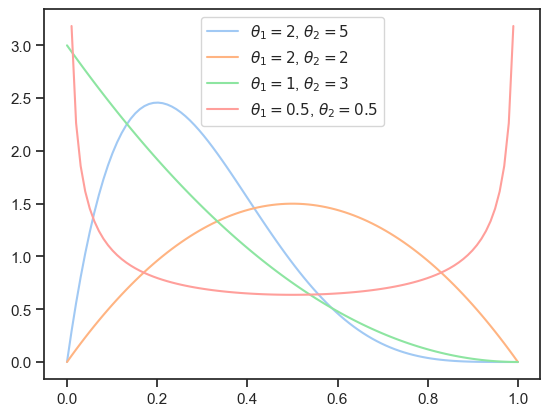

In [10]:
def indicatrix(x, a, b):
    return (x <= b)*(x >= a)

def beta_density(x, theta1=2, theta2=5):
    return (x**(theta1-1))*((1 - x)**(theta2 - 1))*indicatrix(x, 0, 1)/beta(theta1, theta2)

x = np.linspace(0, 1, 100)

thetas = [(2, 5), (2, 2), (1, 3), (.5, .5)]

fig = plt.figure()
ax = fig.add_subplot()

for theta in thetas:
    ax.plot(x, beta_density(x, theta1=theta[0], theta2=theta[1]), label=fr'$\theta_1 = {theta[0]}$, $\theta_2 = {theta[1]}$')

ax.legend()
plt.show()


De ahora en adelante fijamos los parámetros $\theta_1=2$ y $\theta_2=5$.

> 3 - Utilice el método ``NewtonRaphson`` para simular $10000$ réplicas de $X\sim Beta(\theta_1,\theta_2)$. Grafique los resultados.

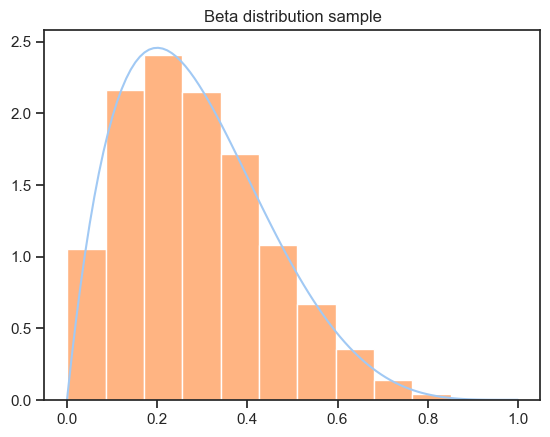

In [11]:
betaval = beta(2, 5)

def beta_distribution(x):
    return (((x - 1)**5)*(5*x + 1)/30 + 1/30)/betaval # Integración con Integral Calculator


beta_sample = newtonRhapson(beta_distribution, beta_density, uniforme(10000, 'numpy'))

fig = plt.figure()

ax = fig.add_subplot(111)

ax.set_title('Beta distribution sample')

# custom_params = {"axes.spines.right": False, "axes.spines.top": False}

# sns.set_theme(style='ticks', palette='pastel')
# sns.histplot(beta_sample, ax=ax)
ax.plot(np.linspace(0, 1, 100), beta_density(np.linspace(0, 1, 100)))
ax.hist(beta_sample, density=True)
plt.show()


> 4 - Programe el método de ``AceptacionRechazo`` que tome una función de densidad $f$ definida en $[0,1]$, una cota apropiada $K$ y dos vectores $u,v\in[0,1]^r$ y retornen réplicas de de una v.a. $X$ de densidad $f$ usando el método de aceptación rechazo usando v.a. auxiliares de densidad $g\sim Unif([0,1])$. 

In [12]:
def aceptaciónRechazo(densityfunc, kbound, uniformsample1, uniformsample2):
    alpha = densityfunc(uniformsample2)/kbound # Me aprovecho de que f está definida en [0, 1], y que g es 1 en ese intervalo.
    accepted_bool = uniformsample1 <= alpha
    return uniformsample2[accepted_bool]

> 5 - Encuentre una cota $K$ para la variable $Beta(\theta_1,\theta_2)$, con $\theta_1,\theta_2$ como en el punto anterior. Implemente el método de aceptación-rechazo con $f_X$ y $K$ para simular réplicas de $Beta(\theta_1,\theta_2)$ usando $10000$ uniformes. Grafique los resultados.

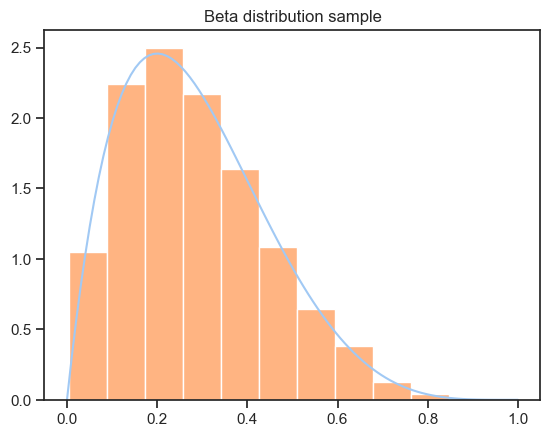

4077


In [13]:
# La constante K la obtengo de maximizar la función densidad de beta,
# obteniendo que es máxima en x = 1/5. Luego beta_density(1/5)*g,
# con g(x) = 1, es siempre mayor o igual que beta_density.

kbound = beta_density(1/5)

beta_sample = aceptaciónRechazo(beta_density, kbound, uniforme(10_000, 'numpy'), uniforme(10_000, 'numpy'))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title('Beta distribution sample')
ax.plot(np.linspace(0, 1, 100), beta_density(np.linspace(0, 1, 100)))
ax.hist(beta_sample, density=True)
plt.show()

# Curiosidad:

print(len(beta_sample))

> 6 - Para $k = 3, \dots , 5$, simule $n = 10^k$ réplicas de $X$ para cada uno de los métodos implementados. Para cada $k$ grafique los histogramas de las muestras obtenidas.

- ¿En que medida coinciden los resultados ambos métodos y por qué?

- Grafique el tiempo de ejecución en función de la cantidad de réplicas, estime el costo por réplica de cada uno de los métodos y ordene los métodos según su eficiencia.

> 7 - Usando el método más eficiente, simule $n = 100000$ réplicas de $X$, calcule las medias y varianzas muestrales, y luego compare los resultados con los valores teóricos.

## Problema 4

Considere $Y_{\lambda,t,s}$ variable aleatoria discreta con

$$ \mathbb{P}(Y_{\lambda,t,s}=k)=\frac{e^{-\lambda}\lambda^k/k!}{\sum^s_{j=t}e^{-\lambda}\lambda^j/j!} \text{ para }k=t,\dots,s \, .$$

Para las evaluaciones considere $\lambda = 5$.

Analizaremos dos métodos que reciban $t$ y $s$, y simulen $n$ réplicas de $Y_{\lambda,t,s}$.

> 1 - Implemente el método de aceptacion-rechazo utilizando variables uniformes discretas.

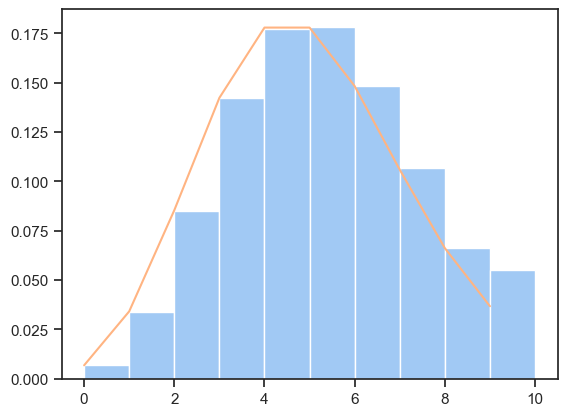

In [65]:
from scipy.special import factorial

lamb = 5

def y_prob(n, t, s):
    numerador = (np.exp(-lamb)*(lamb**n)/factorial(n))
    all_n = np.arange(t, s+1)
    denominador = np.sum(np.exp(-lamb)*(lamb**all_n)/factorial(all_n))
    return numerador/denominador


def y_sample_aceptacionrechazo(n, t, s):
    k = np.max(y_prob(np.arange(t, s+1), t, s))*(s-t+1)
    sample = np.zeros(n)
    i = 0
    while i < n:
        y = np.random.randint(t, s+1)
        alpha = y_prob(y, t, s)/(k*1/(s-t+1))
        if np.random.uniform(0, 1) <= alpha:
            sample[i] = y
            i += 1
    return np.array(sample)

y_sample = y_sample_aceptacionrechazo(100_0000, 0, 10)

plt.hist(y_sample, density=True)
plt.plot(np.arange(0, 10), y_prob(np.arange(0, 10), 0, 10))

> 2 - Implemente el método de simulación condicional de una variable aleatoria apropiada.

TypeError: only integer scalar arrays can be converted to a scalar index

> 3 - Evalue la eficiencia teórica de ambos métodos.

> 4 - Compare la precisión numérica de los dos métodos considerando sus histogramas y las eficiencias numéricas para los siguientes casos:
- $t=0$, $s=10$.
- $t=10$, $s=20$.